In [1]:
import pandas as pd
import numpy as np
import os
os.listdir('./two')

['two_2009_to_2011.csv',
 'two_2012_to_2014.csv',
 'two_2015_to_2017.csv',
 'two_2018_to_2020.csv',
 'two_2021_to_2025.csv']

In [2]:
one = pd.read_csv('./one/one_2009_to_2011.csv')

for path in os.listdir('./one')[1:]:
    new_one = pd.read_csv('./one/' + path)
    one = pd.concat([one, new_one], axis=0)
one.shape

(199, 2)

In [3]:
two = pd.read_csv('./two/two_2009_to_2011.csv')

for path in os.listdir('./two')[1:]:
    new_two = pd.read_csv('./two/' + path)
    two = pd.concat([two, new_two], axis=0)
two.shape

(199, 2)

In [4]:
three = pd.read_csv('./three/three_2009_to_2011.csv')

for path in os.listdir('./three')[1:]:
    new_three = pd.read_csv('./three/' + path)
    three = pd.concat([three, new_three], axis=0)
three.shape

(199, 2)

In [5]:
one.columns = ['일자', 'one_Korea_EPU']
two.columns = ['일자', 'two_Korea_EPU']
three.columns = ['일자', 'three_Korea_EPU']

In [6]:
made_epu = one.merge(two,on='일자').merge(three,on='일자')

In [7]:
환율 = pd.read_csv('어쩌면최종데이터.csv')

# ✅ 결측값 개수 및 비율 계산
null_df = pd.DataFrame({
    '결측값 개수': 환율.isnull().sum(),
    '결측 비율 (%)': 환율.isnull().mean() * 100
})

# ✅ 'alpha'가 컬럼명에 포함된 것 중에서만 결측 비율 5% 이상인 컬럼 필터링
alpha_cols = [col for col in 환율.columns if 'alpha' in col]
alpha_null_df = null_df.loc[alpha_cols]
drop_cols = alpha_null_df[alpha_null_df['결측 비율 (%)'] >= 5].index.tolist()

# ✅ 해당 alpha 컬럼들만 삭제
환율 = 환율.drop(columns=drop_cols)

# ✅ 남은 결측값 전체 삭제 (단, alpha 외 컬럼 포함)
환율 = 환율.dropna()

환율 = 환율.sort_values(by='Date').reset_index(drop=True)
print('완료')

완료


In [8]:
#환율 = 환율[['Date','한국EPU','미환율_종가']]

In [9]:
환율['Date'] = pd.to_datetime(환율['Date'])

In [10]:
환율['일자'] = 환율['Date'].dt.to_period("M").dt.to_timestamp()

In [11]:
made_epu['일자'] = pd.to_datetime(made_epu['일자'])
환율['일자'] = pd.to_datetime(환율['일자'])

In [12]:
df = 환율.merge(made_epu, on='일자')

In [42]:
df['한국EPU	미환율_종가	일자	one_Korea_EPU	two_Korea_EPU	three_Korea_EPU'.split()].corr()['미환율_종가']

한국EPU              0.718404
미환율_종가             1.000000
일자                 0.719475
one_Korea_EPU      0.372429
two_Korea_EPU      0.378994
three_Korea_EPU    0.345632
Name: 미환율_종가, dtype: float64

In [46]:
new_df = df['Date 일자 한국EPU	미환율_종가	일자	one_Korea_EPU	two_Korea_EPU	three_Korea_EPU'.split()]
new_df.head()

,Date,일자,한국EPU,미환율_종가,일자,one_Korea_EPU,two_Korea_EPU,three_Korea_EPU
0,2009-10-09,2009-10-01,83.677435,1164.3,2009-10-01,74.998901,74.393837,62.219456
1,2009-10-13,2009-10-01,83.677435,1166.0,2009-10-01,74.998901,74.393837,62.219456
2,2009-10-14,2009-10-01,83.677435,1157.5,2009-10-01,74.998901,74.393837,62.219456
3,2009-10-15,2009-10-01,83.677435,1157.0,2009-10-01,74.998901,74.393837,62.219456
4,2009-10-16,2009-10-01,83.677435,1162.1,2009-10-01,74.998901,74.393837,62.219456


In [49]:
for year in range(2009, 2026):
    corr_df = df[df['일자'].dt.year == year]
    print(year)
    display(corr_df[['미환율_종가', '한국EPU', 'one_Korea_EPU', 'two_Korea_EPU', 'three_Korea_EPU']].corr()['미환율_종가'])

2009


미환율_종가             1.000000
한국EPU             -0.437476
one_Korea_EPU     -0.436756
two_Korea_EPU     -0.436843
three_Korea_EPU   -0.399567
Name: 미환율_종가, dtype: float64

2010


미환율_종가             1.000000
한국EPU              0.135294
one_Korea_EPU      0.307377
two_Korea_EPU      0.383488
three_Korea_EPU    0.134080
Name: 미환율_종가, dtype: float64

2011


미환율_종가             1.000000
한국EPU              0.945772
one_Korea_EPU      0.945772
two_Korea_EPU      0.945772
three_Korea_EPU   -0.945772
Name: 미환율_종가, dtype: float64

2012


미환율_종가            NaN
한국EPU             NaN
one_Korea_EPU     NaN
two_Korea_EPU     NaN
three_Korea_EPU   NaN
Name: 미환율_종가, dtype: float64

2013


미환율_종가             1.000000
한국EPU              0.655762
one_Korea_EPU      0.526937
two_Korea_EPU      0.526958
three_Korea_EPU   -0.044082
Name: 미환율_종가, dtype: float64

2014


미환율_종가             1.000000
한국EPU              0.285406
one_Korea_EPU      0.445974
two_Korea_EPU      0.500308
three_Korea_EPU    0.680449
Name: 미환율_종가, dtype: float64

2015


미환율_종가             1.000000
한국EPU              0.371381
one_Korea_EPU      0.258820
two_Korea_EPU      0.290868
three_Korea_EPU    0.589055
Name: 미환율_종가, dtype: float64

2016


미환율_종가             1.000000
한국EPU              0.600913
one_Korea_EPU      0.647697
two_Korea_EPU      0.655321
three_Korea_EPU    0.268444
Name: 미환율_종가, dtype: float64

2017


미환율_종가             1.000000
한국EPU              0.651210
one_Korea_EPU      0.745817
two_Korea_EPU      0.744181
three_Korea_EPU    0.602235
Name: 미환율_종가, dtype: float64

2018


미환율_종가             1.000000
한국EPU              0.793466
one_Korea_EPU      0.824980
two_Korea_EPU      0.833289
three_Korea_EPU    0.743665
Name: 미환율_종가, dtype: float64

2019


미환율_종가             1.000000
한국EPU              0.506546
one_Korea_EPU      0.425780
two_Korea_EPU      0.438209
three_Korea_EPU    0.711142
Name: 미환율_종가, dtype: float64

2020


미환율_종가             1.000000
한국EPU              0.602189
one_Korea_EPU      0.638820
two_Korea_EPU      0.644948
three_Korea_EPU   -0.462358
Name: 미환율_종가, dtype: float64

2021


미환율_종가             1.000000
한국EPU              0.743268
one_Korea_EPU      0.601553
two_Korea_EPU      0.601538
three_Korea_EPU    0.555420
Name: 미환율_종가, dtype: float64

2022


미환율_종가             1.000000
한국EPU              0.220264
one_Korea_EPU      0.495414
two_Korea_EPU      0.489649
three_Korea_EPU   -0.181595
Name: 미환율_종가, dtype: float64

2023


미환율_종가             1.000000
한국EPU             -0.229827
one_Korea_EPU     -0.011562
two_Korea_EPU      0.006619
three_Korea_EPU    0.262019
Name: 미환율_종가, dtype: float64

2024


미환율_종가             1.000000
한국EPU              0.603800
one_Korea_EPU      0.627068
two_Korea_EPU      0.627624
three_Korea_EPU    0.783152
Name: 미환율_종가, dtype: float64

2025


미환율_종가             1.000000
한국EPU              0.273227
one_Korea_EPU      0.633740
two_Korea_EPU      0.568244
three_Korea_EPU    0.453797
Name: 미환율_종가, dtype: float64

In [53]:
for year in range(2022, 2026):
    corr_df = df[df['일자'].dt.year == year]
    print(year)
    display(corr_df[['미환율_종가', '한국EPU', 'one_Korea_EPU', 'two_Korea_EPU', 'three_Korea_EPU']].corr()['미환율_종가'])

2022


미환율_종가             1.000000
한국EPU              0.220264
one_Korea_EPU      0.495414
two_Korea_EPU      0.489649
three_Korea_EPU   -0.181595
Name: 미환율_종가, dtype: float64

2023


미환율_종가             1.000000
한국EPU             -0.229827
one_Korea_EPU     -0.011562
two_Korea_EPU      0.006619
three_Korea_EPU    0.262019
Name: 미환율_종가, dtype: float64

2024


미환율_종가             1.000000
한국EPU              0.603800
one_Korea_EPU      0.627068
two_Korea_EPU      0.627624
three_Korea_EPU    0.783152
Name: 미환율_종가, dtype: float64

2025


미환율_종가             1.000000
한국EPU              0.273227
one_Korea_EPU      0.633740
two_Korea_EPU      0.568244
three_Korea_EPU    0.453797
Name: 미환율_종가, dtype: float64

In [52]:
corr_df = df[df['일자'].dt.year >= 2022]
corr_df[['미환율_종가', '한국EPU', 'one_Korea_EPU', 'two_Korea_EPU', 'three_Korea_EPU']].corr()['미환율_종가']

미환율_종가             1.000000
한국EPU              0.253818
one_Korea_EPU      0.309291
two_Korea_EPU      0.329300
three_Korea_EPU    0.595321
Name: 미환율_종가, dtype: float64

- 2022년부터 직접 만든 게 더 잘 설명하네

In [55]:
plt.rcParams['font.family']='Malgun Gothic'

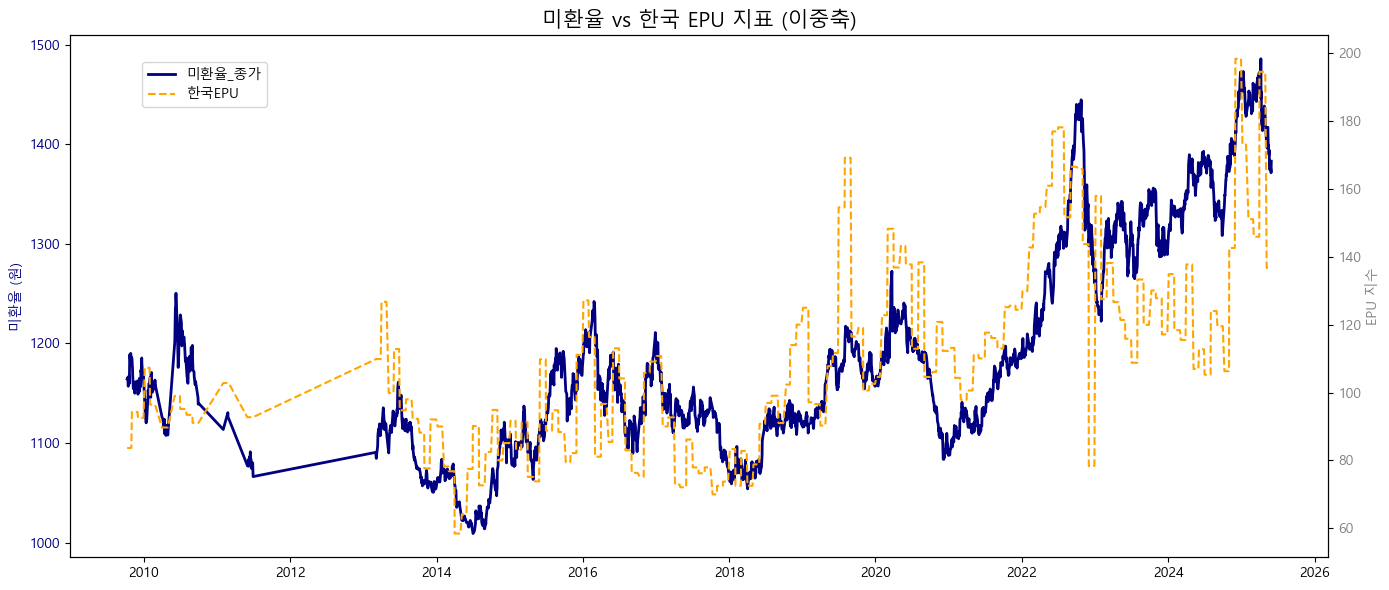

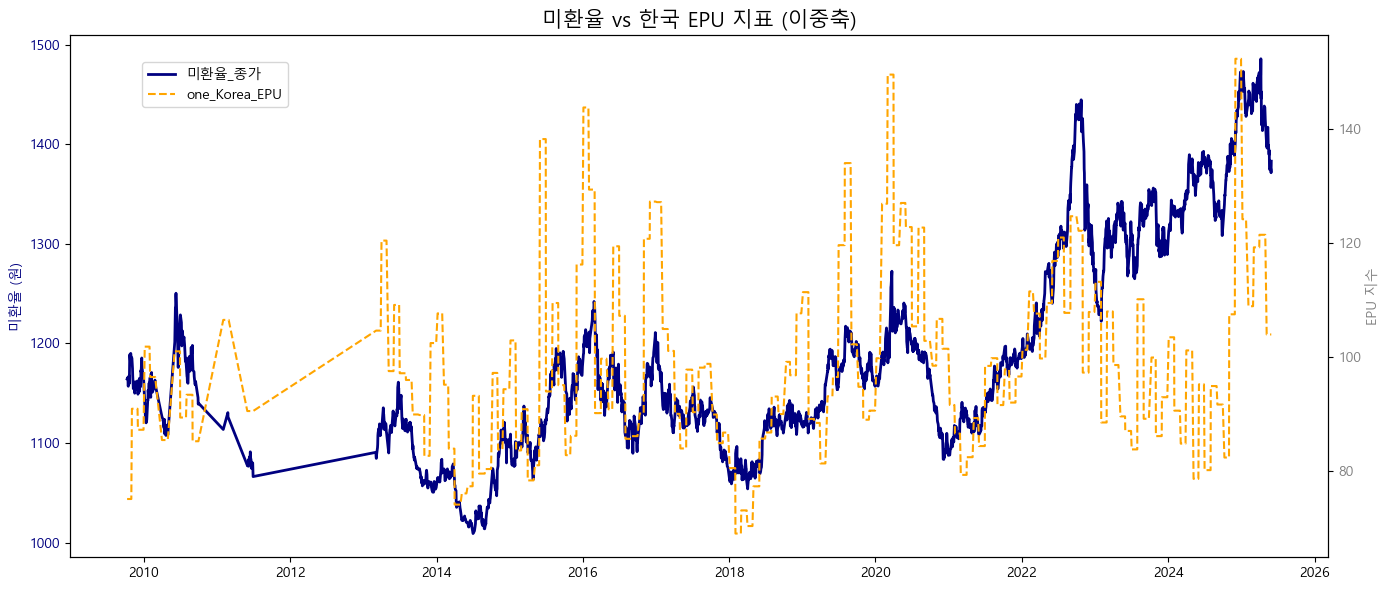

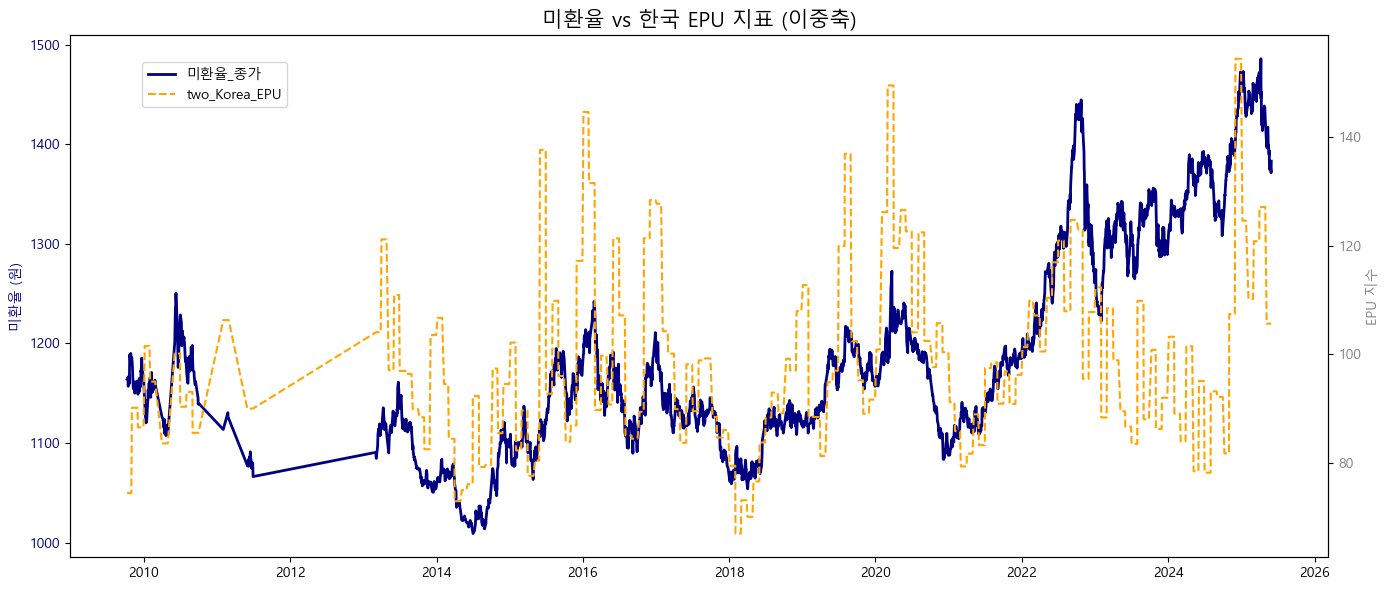

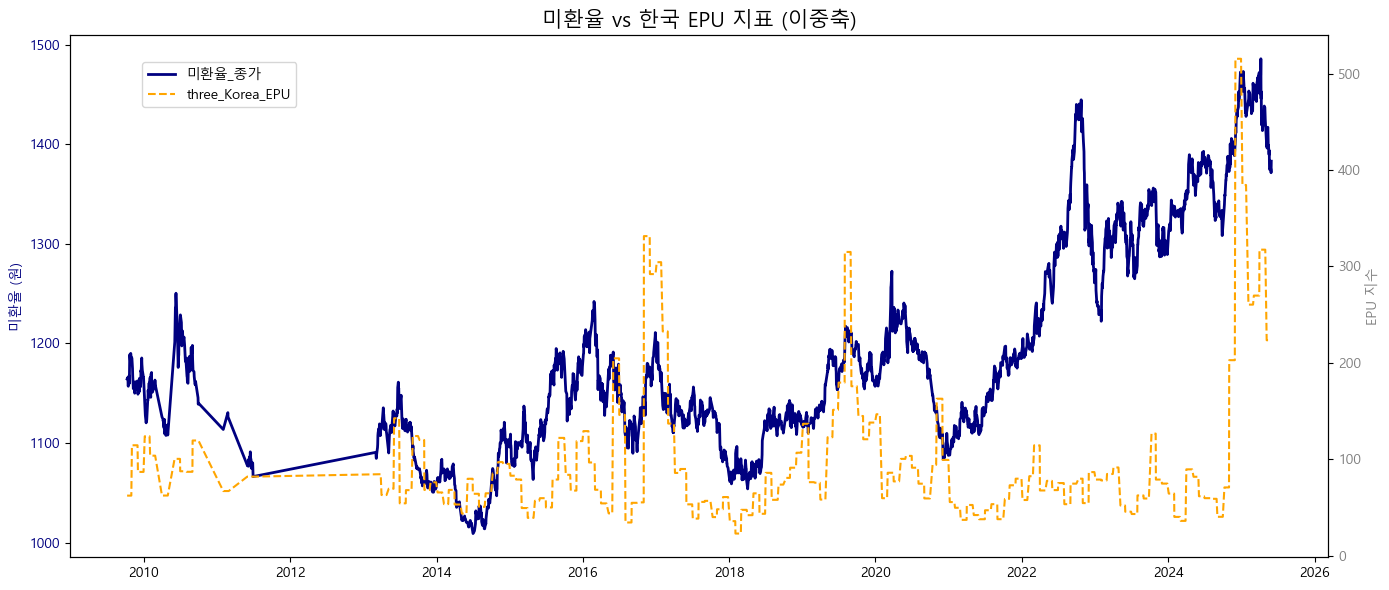

In [58]:
import matplotlib.pyplot as plt

# 날짜 정렬
df = df.sort_values('Date')

for col in ['한국EPU','one_Korea_EPU','two_Korea_EPU','three_Korea_EPU']:
    # 그래프 기본 설정
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # 첫 번째 y축: 환율
    ax1.plot(df['Date'], df['미환율_종가'], color='navy', label='미환율_종가', linewidth=2)
    ax1.set_ylabel('미환율 (원)', color='navy')
    ax1.tick_params(axis='y', labelcolor='navy')
    
    # 두 번째 y축: EPU 지표들
    ax2 = ax1.twinx()
    ax2.plot(df['Date'], df[col], label=col, color='orange', linestyle='--')
    ax2.set_ylabel('EPU 지수', color='gray')
    ax2.tick_params(axis='y', labelcolor='gray')
    
    # 제목 및 범례
    plt.title('미환율 vs 한국 EPU 지표 (이중축)', fontsize=15)
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    
    plt.tight_layout()
    plt.show()

# 모델링 성능 비교

In [78]:
df = df.drop(columns='일자')
df.columns

Index(['Date', '미환율_종가', '미환율_시가', '미환율_고가', '미환율_저가', '미환율_변동%', 'WTI유_종가',
       'WTI유_시가', 'WTI유_고가', 'WTI유_저가',
       ...
       '코스피_검색량', '일본EPU', '중국EPU', '한국EPU', '미국EPU', '글로벌EPU_명목GDP기준',
       '글로벌EPU_PPP기준', 'one_Korea_EPU', 'two_Korea_EPU', 'three_Korea_EPU'],
      dtype='object', length=202)

In [79]:
df = df.sort_values(by='Date').reset_index(drop=True)

In [83]:
epu_results = []  # EPU 지표별 최종 성능 저장용 리스트

for col in [ 'one_Korea_EPU', 'two_Korea_EPU', 'three_Korea_EPU']:
    new_df = df.copy()
    new_df = new_df.drop(columns=[ 'one_Korea_EPU', 'two_Korea_EPU', 'three_Korea_EPU'])
    new_df['한국EPU'] =df[col]
    import pandas as pd
    import numpy as np
    import os
    import random
    import tensorflow as tf
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import f1_score, classification_report, confusion_matrix
    
    # ✅ Seed 고정
    SEED = 42
    os.environ['PYTHONHASHSEED'] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    tf.keras.utils.set_random_seed(SEED)
    tf.config.experimental.enable_op_determinism()
    
    # ✅ Focal Loss 정의
    def focal_loss(gamma=2., alpha=0.5):
        def focal_loss_fixed(y_true, y_pred):
            epsilon = tf.keras.backend.epsilon()
            y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
            pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
            pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
            return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
                   -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
        return focal_loss_fixed
    
    # ✅ 하이퍼파라미터 범위 설정
    change_cut = 5
    alpha_list = np.round(np.arange(0.01, 1.0, 0.1), 2)       # 성능 중심 구간
    threshold_list = np.round(np.arange(0.1, 1.0, 0.1), 2)    # 유효 범위 압축
    weight_list = np.round(np.arange(6.0, 16.0, 1.0), 2)      # class_weight_1
    
    # ✅ 결과 저장
    final_results = []
    
    # 🎯 데이터 준비
    new_df2 = new_df.copy()
    new_df2['next_day_close'] = new_df2['미환율_종가'].shift(-1)
    new_df2['change'] = new_df2['next_day_close'] - new_df2['미환율_종가']
    new_df2['target'] = (new_df2['change'] >= change_cut).astype(int)
    new_df2 = new_df2.dropna().reset_index(drop=True)
    
    X = new_df2.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
    y = new_df2['target'].values
    
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 🎯 시퀀스 구성
    seq_length = 10
    X_seq, y_seq = [], []
    for i in range(seq_length, len(X_scaled)):
        X_seq.append(X_scaled[i-seq_length:i])
        y_seq.append(y[i])
    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)
    
    # 🎯 train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)
    
    # ✅ 튜닝 시작
    for class_weight_1 in weight_list:
        class_weights = {0: 1.0, 1: class_weight_1}
        
        for alpha in alpha_list:
            # 모델 구성
            inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
            x = LSTM(64, return_sequences=True)(inputs)
            x = LSTM(32)(x)
            x = Dropout(0.2)(x)
            outputs = Dense(1, activation='sigmoid')(x)
            model = Model(inputs, outputs)
    
            model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])
    
            early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
            model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=100,
                      batch_size=32,
                      callbacks=[early_stop],
                      verbose=0,
                      class_weight=class_weights)
    
            y_proba = model.predict(X_test).flatten()
    
            for threshold in threshold_list:
                y_pred = (y_proba > threshold).astype(int)
                macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
                final_results.append({
                    'alpha': alpha,
                    'threshold': threshold,
                    'class_weight_1': class_weight_1,
                    'macro_f1': macro_f1
                })
    
    # ✅ 최적 조합 선택
    df_results = pd.DataFrame(final_results)
    best_row = df_results.loc[df_results['macro_f1'].idxmax()]
    best_alpha = best_row['alpha']
    best_threshold = best_row['threshold']
    best_weight = best_row['class_weight_1']
    
    # ✅ 최적 조합 재적용
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
    x = LSTM(64, return_sequences=True)(inputs)
    x = LSTM(32)(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    
    model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])
    
    model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=100,
              batch_size=32,
              callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
              verbose=0,
              class_weight={0: 1.0, 1: best_weight})
    
    # ✅ 최종 예측 및 평가
    y_proba = model.predict(X_test).flatten()
    y_pred = (y_proba > best_threshold).astype(int)
    
    print(f"\n✅ [최종 조합 적용 결과]")
    print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
    print("\n📊 분류 리포트:")
    print(classification_report(y_test, y_pred))
    print("🧩 혼동 행렬:")
    print(confusion_matrix(y_test, y_pred))
    epu_results.append({
            'EPU지표': col,
            'change_cut': change_cut,
            'best_alpha': best_alpha,
            'best_threshold': best_threshold,
            'best_class_weight_1': best_weight,
            'macro_f1': f1_score(y_test, y_pred, average='macro')
        })

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step

In [85]:
for col in [ '한국EPU']:
    new_df = df.copy()
    new_df = new_df.drop(columns=[ 'one_Korea_EPU', 'two_Korea_EPU', 'three_Korea_EPU'])
    new_df['한국EPU'] =df[col]
    import pandas as pd
    import numpy as np
    import os
    import random
    import tensorflow as tf
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import f1_score, classification_report, confusion_matrix
    
    # ✅ Seed 고정
    SEED = 42
    os.environ['PYTHONHASHSEED'] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    tf.keras.utils.set_random_seed(SEED)
    tf.config.experimental.enable_op_determinism()
    
    # ✅ Focal Loss 정의
    def focal_loss(gamma=2., alpha=0.5):
        def focal_loss_fixed(y_true, y_pred):
            epsilon = tf.keras.backend.epsilon()
            y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
            pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
            pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
            return -tf.reduce_mean(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
                   -tf.reduce_mean((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
        return focal_loss_fixed
    
    # ✅ 하이퍼파라미터 범위 설정
    change_cut = 5
    alpha_list = np.round(np.arange(0.01, 1.0, 0.1), 2)       # 성능 중심 구간
    threshold_list = np.round(np.arange(0.1, 1.0, 0.1), 2)    # 유효 범위 압축
    weight_list = np.round(np.arange(6.0, 16.0, 1.0), 2)      # class_weight_1
    
    # ✅ 결과 저장
    final_results = []
    
    # 🎯 데이터 준비
    new_df2 = new_df.copy()
    new_df2['next_day_close'] = new_df2['미환율_종가'].shift(-1)
    new_df2['change'] = new_df2['next_day_close'] - new_df2['미환율_종가']
    new_df2['target'] = (new_df2['change'] >= change_cut).astype(int)
    new_df2 = new_df2.dropna().reset_index(drop=True)
    
    X = new_df2.drop(columns=['Date', '기준년월', 'return', 'return_future', 'target', 'next_day_close', 'change'], errors='ignore')
    y = new_df2['target'].values
    
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 🎯 시퀀스 구성
    seq_length = 10
    X_seq, y_seq = [], []
    for i in range(seq_length, len(X_scaled)):
        X_seq.append(X_scaled[i-seq_length:i])
        y_seq.append(y[i])
    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)
    
    # 🎯 train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)
    
    # ✅ 튜닝 시작
    for class_weight_1 in weight_list:
        class_weights = {0: 1.0, 1: class_weight_1}
        
        for alpha in alpha_list:
            # 모델 구성
            inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
            x = LSTM(64, return_sequences=True)(inputs)
            x = LSTM(32)(x)
            x = Dropout(0.2)(x)
            outputs = Dense(1, activation='sigmoid')(x)
            model = Model(inputs, outputs)
    
            model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=alpha), metrics=['accuracy'])
    
            early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
            model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=100,
                      batch_size=32,
                      callbacks=[early_stop],
                      verbose=0,
                      class_weight=class_weights)
    
            y_proba = model.predict(X_test).flatten()
    
            for threshold in threshold_list:
                y_pred = (y_proba > threshold).astype(int)
                macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
                final_results.append({
                    'alpha': alpha,
                    'threshold': threshold,
                    'class_weight_1': class_weight_1,
                    'macro_f1': macro_f1
                })
    
    # ✅ 최적 조합 선택
    df_results = pd.DataFrame(final_results)
    best_row = df_results.loc[df_results['macro_f1'].idxmax()]
    best_alpha = best_row['alpha']
    best_threshold = best_row['threshold']
    best_weight = best_row['class_weight_1']
    
    # ✅ 최적 조합 재적용
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
    x = LSTM(64, return_sequences=True)(inputs)
    x = LSTM(32)(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    
    model.compile(optimizer='adam', loss=focal_loss(gamma=2., alpha=best_alpha), metrics=['accuracy'])
    
    model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=100,
              batch_size=32,
              callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
              verbose=0,
              class_weight={0: 1.0, 1: best_weight})
    
    # ✅ 최종 예측 및 평가
    y_proba = model.predict(X_test).flatten()
    y_pred = (y_proba > best_threshold).astype(int)
    
    print(f"\n✅ [최종 조합 적용 결과]")
    print(f"change_cut: {change_cut}, alpha: {best_alpha}, threshold: {best_threshold:.4f}, class_weight_1: {best_weight}, macro f1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")
    print("\n📊 분류 리포트:")
    print(classification_report(y_test, y_pred))
    print("🧩 혼동 행렬:")
    print(confusion_matrix(y_test, y_pred))
    epu_results.append({
            'EPU지표': col,
            'change_cut': change_cut,
            'best_alpha': best_alpha,
            'best_threshold': best_threshold,
            'best_class_weight_1': best_weight,
            'macro_f1': f1_score(y_test, y_pred, average='macro')
        })

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

In [87]:
# 🎯 지표별 성능 비교 결과 출력
epu_result_df = pd.DataFrame(epu_results)
print("\n\n📈 EPU 지표별 성능 비교 결과:")
print(epu_result_df.sort_values(by='macro_f1', ascending=False).to_string(index=False))



📈 EPU 지표별 성능 비교 결과:
          EPU지표  change_cut  best_alpha  best_threshold  best_class_weight_1  macro_f1
  one_Korea_EPU           5        0.21             0.3                 12.0  0.540461
  two_Korea_EPU           5        0.21             0.3                 12.0  0.540461
three_Korea_EPU           5        0.21             0.3                 14.0  0.538369
          한국EPU           5        0.21             0.3                 12.0  0.522400
